# Arago point


Here, we analyze how Arago point (also called Poisson spot) is generated using in XY and XYZ framework.

More information: https://www.lighttrans.com/use-cases/application-use-cases/observation-of-the-poisson-spot.html



## XY

In [1]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [2]:
x0=np.linspace(-200*um, 200*um, 512)
y0=np.linspace(-200*um, 200*um, 1024)
wavelength=532*nm

In [3]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0*um, 0*um), w0=130*um, z0=0, A=1, theta=0.0)

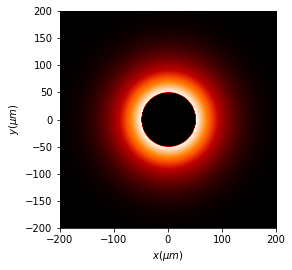

In [5]:
obstacle=Scalar_mask_XY(x0,y0,wavelength)
obstacle.circle(r0=(0*um, 0*um), radius=50*um)
obstacle.inverse_amplitude()

u1=u0*obstacle

u1.draw();

In [6]:
arago_point=u1.RS(z=2*mm)

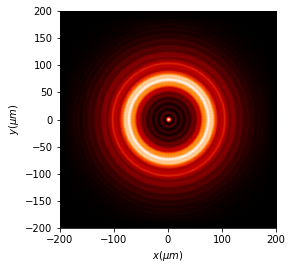

In [7]:
arago_point.draw(logarithm=True);

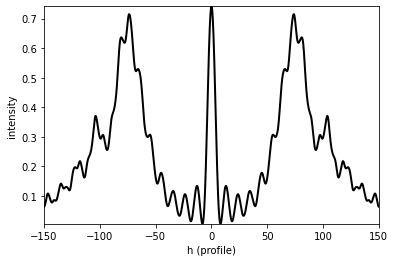

In [8]:
arago_point.draw_profile([-150,0], [150,0], npixels=2048, order=2);

## XYZ

In [9]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY


In [28]:
import pyvista as pv
pv.set_jupyter_backend('static')

In [11]:
x0=np.linspace(-200*um, 200*um, 512)
y0=np.linspace(-200*um, 200*um, 256)
z0=np.linspace(1*mm, 2*mm, 32)

wavelength=532*nm

In [12]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0*um, 0*um), w0=130*um, z0=0, A=1, theta=0.0)

In [13]:
obstacle=Scalar_mask_XY(x0,y0,wavelength)
obstacle.circle(r0=(0*um, 0*um), radius=50*um)
obstacle.inverse_amplitude()

u1=u0*obstacle

In [14]:
u_xyz=Scalar_field_XYZ(x0,y0,z0,wavelength)

In [15]:
u_xyz.incident_field(u1)

In [17]:
u_xyz.RS(num_processors=1)

time in RS= 5.855224847793579. num proc= 1


<Figure size 432x288 with 0 Axes>

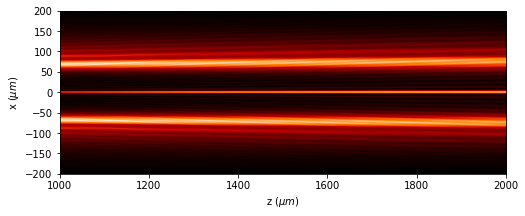

In [18]:
u_xyz.draw_XZ(y0=0)
fig=plt.gcf()
fig.set_size_inches(8,3)

## XZ

**Warning**: The XZ results are **not valid** since, as it is an interferential process, radial symmetry is required. 

In [19]:
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

In [20]:
x0=np.linspace(-200*um, 200*um, 1024)
z0=np.linspace(1*mm, 2*mm, 512)
wavelength=532*nm

In [21]:
source_x=Scalar_source_X(x0,wavelength)
source_x.gauss_beam(x0=0, w0=130*um, z0=0, A=1, theta=0.0)

In [22]:
mask_x=Scalar_mask_X(x0,wavelength)
mask_x.slit(x0=0, size=100*um);
mask_x.u=1-mask_x.u

In [23]:
u1=source_x*mask_x

In [24]:
arago_xz=Scalar_mask_XZ(x0,z0,wavelength)
arago_xz.incident_field(u1)

In [25]:
arago_xz.RS()

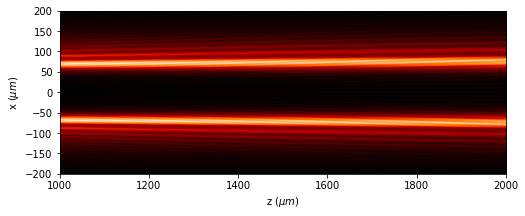

In [26]:
arago_xz.draw()
fig=plt.gcf()
fig.set_size_inches(8,3);